# Practice with subplots using earthquake data

http://matplotlib.org/examples/pylab_examples/subplots_demo.html


In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

DATA_FILENAME = Path('data', 'usgs', 'raw', 'worldwide-m6-quakes.csv')

In [2]:
quakes = pd.read_csv(str(DATA_FILENAME), parse_dates=['time'])

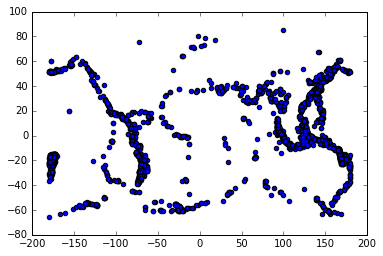

In [15]:
fig, ax = plt.subplots()
ax.scatter(quakes['longitude'], quakes['latitude']);

In [4]:
quakes.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-04-30 08:35:42.380,-16.3056,167.1879,4.77,6.0,mwp,NaN,36,0.853,1.09,...,2016-04-30T22:56:40.000Z,"32km SW of Lakatoro, Vanuatu",earthquake,6.4,4.5,0.059,33,reviewed,us,us
1,2016-04-29 01:33:38.940,10.2705,-103.7150,10.00,6.6,mww,NaN,62,8.803,0.94,...,2016-04-29T16:09:17.040Z,Northern East Pacific Rise,earthquake,9.1,1.7,NaN,NaN,reviewed,us,us
2,2016-04-28 19:33:24.420,-16.0743,167.3926,27.17,7.0,mww,NaN,14,0.649,1.29,...,2016-05-02T16:24:24.836Z,"1km SE of Norsup, Vanuatu",earthquake,5.9,3.3,NaN,NaN,reviewed,us,us


## Simple double-row plot

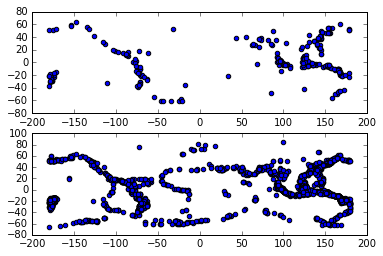

In [5]:
qbig = quakes[quakes['mag'] >= 7]
qsmall = quakes[quakes['mag'] < 7]

fig, axes = plt.subplots(2)
axes[0].scatter(qbig['longitude'], qbig['latitude'])
axes[1].scatter(qsmall['longitude'], qsmall['latitude']);


In [6]:
### Double-row plot, share the x-axis

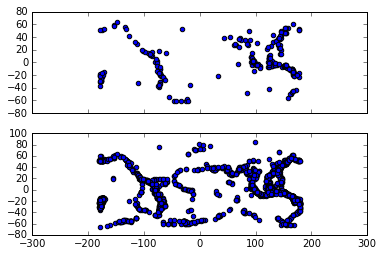

In [7]:
fig, axes = plt.subplots(2, sharex=True)
axes[0].scatter(qbig['longitude'], qbig['latitude'])
axes[1].scatter(qsmall['longitude'], qsmall['latitude']);


## Double-column plot and sharing the y-axis

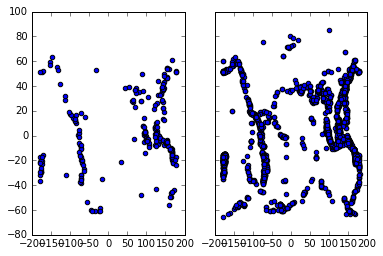

In [8]:
fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].scatter(qbig['longitude'], qbig['latitude'])
axes[1].scatter(qsmall['longitude'], qsmall['latitude']);


## 2x2 plot, sharing x and y-axes

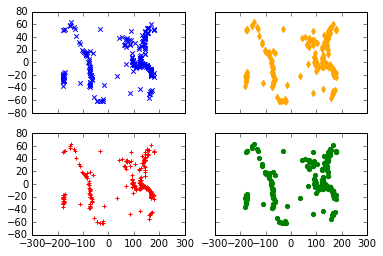

In [9]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True)

axes[0][0].scatter(qbig['longitude'], qbig['latitude'], color='blue', marker='x')
axes[0][1].scatter(qbig['longitude'], qbig['latitude'], color='orange', marker='d')
axes[1][0].scatter(qbig['longitude'], qbig['latitude'], color='red', marker='+')
axes[1][1].scatter(qbig['longitude'], qbig['latitude'], color='green', marker='8');


# Dynamic number of rows

Create a 1-column chart with a chart for each year

In [10]:
years = quakes['time'].dt.year.sort_values().unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

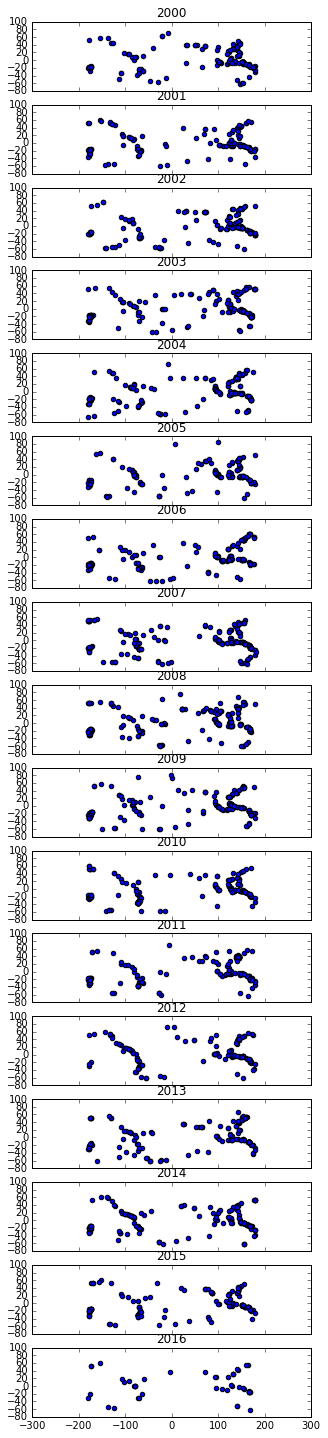

In [11]:
nrow = len(years)
fig, axlist = plt.subplots(nrow, sharex=True, figsize=(5, 25), sharey=True)

for n in range(nrow):
    # pick out the year (number) from the array of years
    yr = years[n]
    # facet the data for one year's data
    qdf = quakes[quakes['time'].dt.year == yr]
    # choose the correct axes
    ax = axlist[n]
    ax.scatter(qdf['longitude'], qdf['latitude'])
    ax.set_title(yr)


### Hiding axis labels across all charts


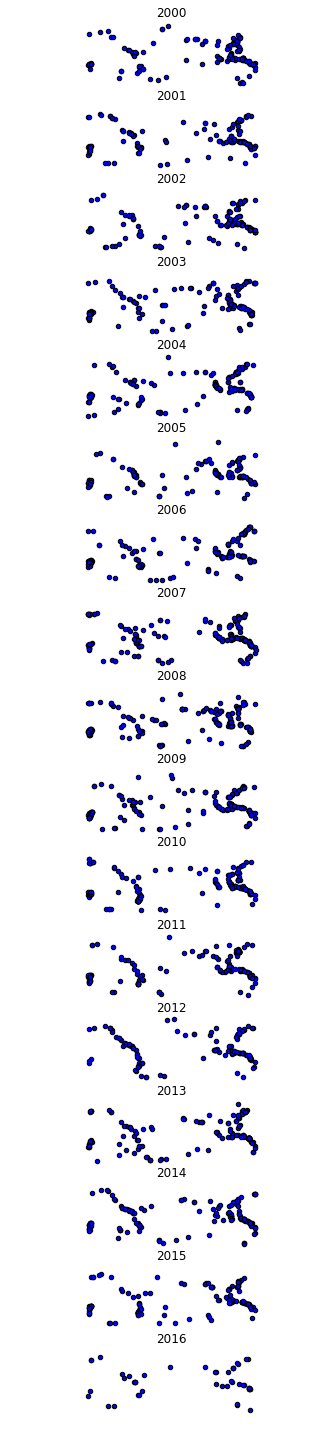

In [12]:
nrow = len(years)
fig, axlist = plt.subplots(nrow, sharex=True, figsize=(5, 25))

for n in range(nrow):
    yr = years[n]
    qdf = quakes[quakes['time'].dt.year == yr]
    ax = axlist[n]
    ax.scatter(qdf['longitude'], qdf['latitude'])
    ax.set_title(yr)
    ax.set_axis_off()

# Delete cells

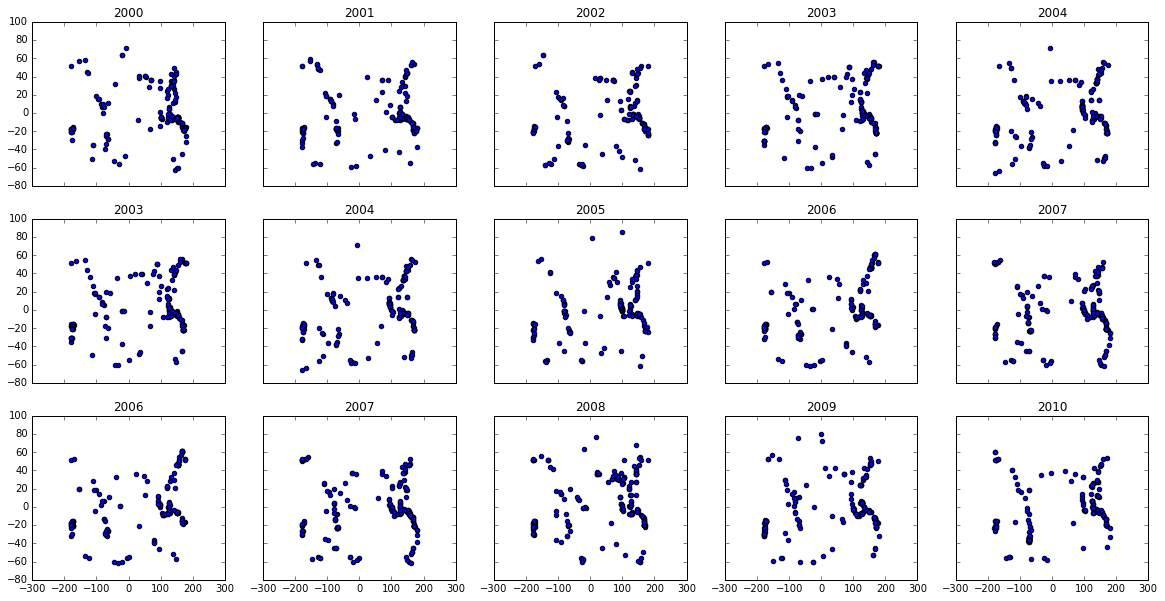

In [13]:
ncol = 3 # hardcoded
nrow = int(len(years) / ncol)

fig, axlist = plt.subplots(ncol, nrow, figsize=(20, 10),
                           sharex=True, sharey=True)

for i in range(ncol):
    for j in range(nrow):
        # Have to convert colnum x rownum (i.e. i and j) into
        # the proper n-number of iteration, 
        # e.g. for col 3, row 5, n will be: 
        # (i * ncol) + j
        # (2 * 1) + 4
        # n = 6
        n = (i * ncol) + j
        yr = years[n]
        qdf = quakes[quakes['time'].dt.year == yr]
        ax = axlist[i][j]
        ax.scatter(qdf['longitude'], qdf['latitude'])
        ax.set_title(str(yr))


Notice what happens when you change the order of iteration in the loop:

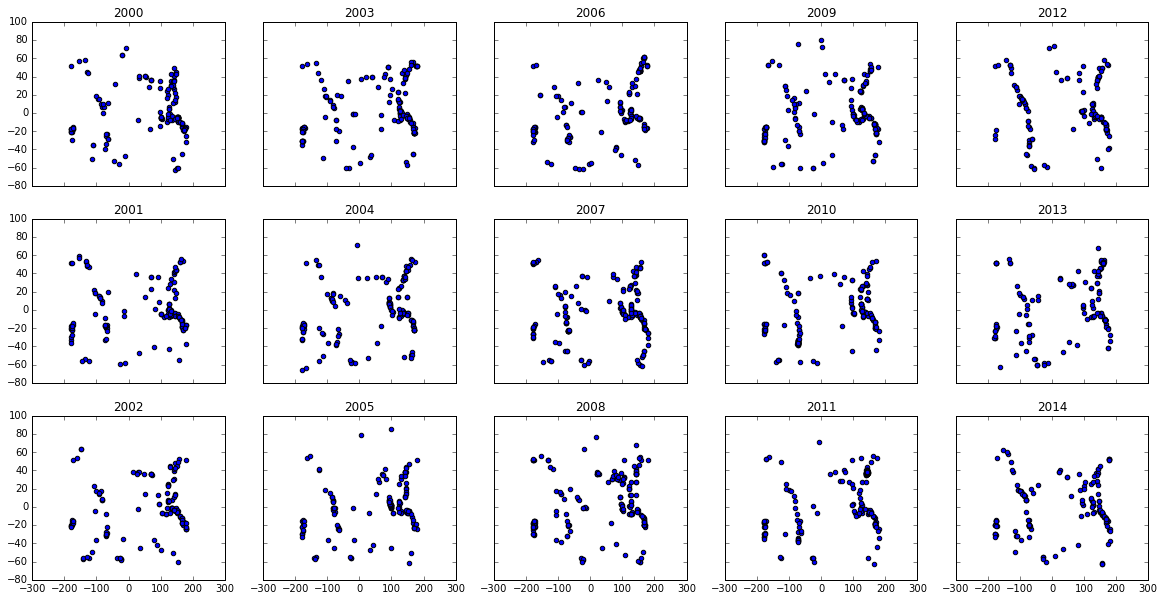

In [14]:
ncol = 3 # hardcoded
nrow = int(len(years) / ncol)

fig, axlist = plt.subplots(ncol, nrow, figsize=(20, 10),
                           sharex=True, sharey=True)
# outer loop is rows
for j in range(nrow):
    # inner loop is columns
    for i in range(ncol):
        # need to recalculate n
        n = (j * ncol) + i
        yr = years[n]
        qdf = quakes[quakes['time'].dt.year == yr]
        ax = axlist[i][j]
        ax.scatter(qdf['longitude'], qdf['latitude'])
        ax.set_title(str(yr))